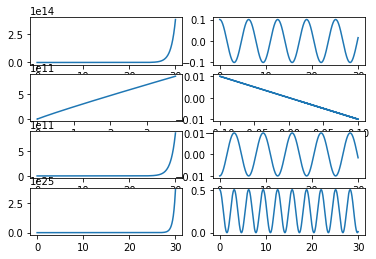

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


t = 0
v0 = 0
x0 = 0.1
dt = 0.01
w = 1
g = 10
l = 10
m = 1
tf = 30

xan = x0
xrk = x0

van = v0
vrk = v0

xan_list, van_list, etan_list = [], [], []
xrk_list, vrk_list, etrk_list = [], [], []
t_list = []

fig, axs = plt.subplots(4, 2)


while t < tf:
    t += dt

    # Analitico
    xan = x0 * np.cos(w * t)
    van = -(w * w * np.cos(w * t) * dt)

    Ecan = m * (van * van) * l**2 * 0.5
    Epan = m * g * l * (1 - np.cos(xan))
    Etan = Ecan + Epan

    van_list.append(van)
    etan_list.append(Etan)
    xan_list.append(xan)

    # Runge-Kuta
    k1x = xrk + vrk * dt
    k1v = vrk - w**2 * np.sin(xrk) * dt
    xaux = xrk + k1x * dt * 0.5
    vaux = vrk + k1v * dt * 0.5
    k2x = xaux + vaux * (t + dt * 0.5)
    k2v = vaux - w**2 * np.sin(xaux) * (t + dt * 0.5)
    xrk += k2x * dt
    vrk += k2v * dt

    Ecrk = m * (vrk * vrk) * l**2 * 0.5
    Eprk = m * g * l * (1 - np.cos(xrk))
    Etrk = Ecrk + Eprk

    vrk_list.append(vrk)
    etrk_list.append(Etrk)
    xrk_list.append(xrk)

    t_list.append(t)

axs[0, 0].plot(t_list, xrk_list)
axs[1, 0].plot(xrk_list, vrk_list)
axs[2, 0].plot(t_list, vrk_list)
axs[3, 0].plot(t_list, etrk_list)

axs[0, 1].plot(t_list, xan_list)
axs[1, 1].plot(xan_list, van_list)
axs[2, 1].plot(t_list, van_list)
axs[3, 1].plot(t_list, etan_list)
